In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [15]:
with open('walle_fin_run.json', 'r') as json_file:
    data = json.load(json_file)
    print('Loaded', len(data), 'data points')

Loaded 43942 data points


In [61]:
time = np.array([])
posx = np.array([])
posy = np.array([])
vel = np.array([])
avg_vel = np.array([])
collision_count = 0
collision_points = np.array([])
for point in data:
    time = np.append(time, point['time'])
    posx = np.append(posx, point['pos']['x'])
    posy = np.append(posy, point['pos']['y'])
    vel = np.append(vel, point['current_lin_vel'])
    avg_vel = np.append(avg_vel, point['lin_avg'])
    if point['collisions'] > collision_count:
        collision_count = point['collisions']
        np.append(collision_points, np.array([point['time'], point['pos']['x'], point['pos']['y']]))

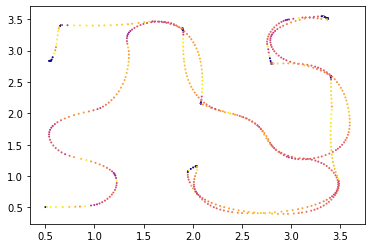

In [74]:
plt.scatter(posx[2:14500:25], posy[2:14500:25], c=vel[2:14500:25], cmap='plasma', s=1)

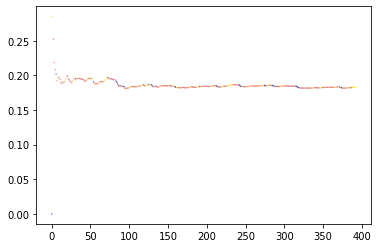

In [70]:

plt.scatter((time-time[0])[2::125], avg_vel[2::125], s=0.1, c=vel[2::125], cmap='plasma')

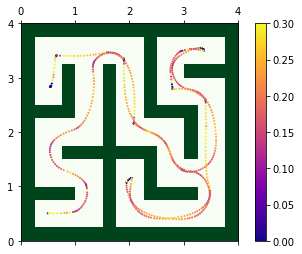

In [88]:
maze = np.flipud(np.array([
    #|     |     |     |     |     |
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1],
    [1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,1],
    [1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1],
    [1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1],
    [1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1],
    [1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1],
    [1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1],
    [1,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1],
    [1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1],
    [1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1],
    [1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1],
    [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
]))

fig, ax = plt.subplots()
ax.matshow(maze, extent=[0,4,4,0], cmap='Greens')
ax.invert_yaxis()
cax = ax.scatter(posx[2:14500:25], posy[2:14500:25], c=vel[2:14500:25], cmap='plasma', s=1)
fig.colorbar(cax)